In [2]:
import pandas as pd
import numpy as np
data_set = pd.read_json("./DataSet/items.jl", lines=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37145 entries, 0 to 37144
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   url          37145 non-null  object        
 1   brand        37145 non-null  object        
 2   serie        36732 non-null  object        
 3   model_year   36617 non-null  float64       
 4   price_vnd    37145 non-null  int64         
 5   date         37145 non-null  datetime64[ns]
 6   info         37145 non-null  object        
 7   description  37145 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.6+ MB


In [2]:
data_set.head()


,url,brand,serie,model_year,price_vnd,date,info,description
0,https://bonbanh.com/xe-toyota-corolla_altis-1....,Toyota,Corolla altis,2015.0,548,2021-01-02,"{'Xuất xứ:': 'Lắp ráp trong nước', 'Tình trạng...","Mình bán Toyota Altis 2015, tự động 1.8, phom ..."
1,https://bonbanh.com/xe-mazda-3-1.6-at-2010-360...,Mazda,3,2010.0,335,2021-01-02,"{'Xuất xứ:': 'Nhập khẩu', 'Tình trạng:': 'Xe đ...",Siêu thị ô tô Ánh Lý bán xe Mazda 3 sản xuất 2...
2,https://bonbanh.com/xe-lexus-is-250-2007-3622299,Lexus,IS,2007.0,570,2021-01-02,"{'Xuất xứ:': 'Nhập khẩu', 'Tình trạng:': 'Xe đ...",LEXUS IS250 ✅ Màu Trắng nội thất nâu. ✅ Odo 8...
3,https://bonbanh.com/xe-toyota-land_cruiser-4.6...,Toyota,Land Cruiser,2020.0,4550,2021-01-02,"{'Xuất xứ:': 'Nhập khẩu', 'Tình trạng:': 'Xe đ...","Land cruiser V8 4.6 full option cửa nóc, loa J..."
4,https://bonbanh.com/xe-toyota-camry-2.5q-2014-...,Toyota,Camry,2014.0,760,2021-01-02,"{'Xuất xứ:': 'Lắp ráp trong nước', 'Tình trạng...",Hiền Toyota CN Bình Triệu có sẵn Camry 2.5Q 20...


In [6]:
# Handle info car
data_info = data_set["info"]
use_data = [key for key in data_info[0].keys()]
data_set_info = {}.fromkeys(use_data)
for info_car in data_set["info"]:
    for key in use_data:
        if data_set_info[key] is None:
            temp_list = [info_car.get(key)]
            data_set_info[key] = temp_list
        else:
            data_set_info[key].append(info_car[key])
df_info = pd.DataFrame(data_set_info)
new_data_set = data_set.join(df_info)
new_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37145 entries, 0 to 37144
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   url                                              37145 non-null  object        
 1   brand                                            37145 non-null  object        
 2   serie                                            36732 non-null  object        
 3   model_year                                       36617 non-null  float64       
 4   price_vnd                                        37145 non-null  int64         
 5   date                                             37145 non-null  datetime64[ns]
 6   info                                             37145 non-null  object        
 7   description                                      37145 non-null  object        
 8   Xuất xứ:                            

c:\users\le khang\desktop\projectexample\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tình trạng:', ylabel='count'>

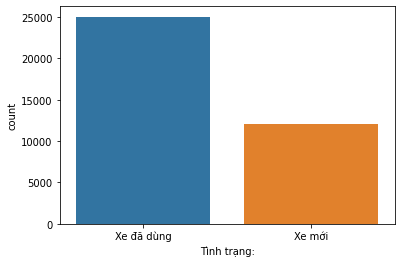

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
# new_data_set["price_vnd"] = np.log(new_data_set["price_vnd"])
# plot giá xe theo tình trạng
sns.countplot(new_data_set["Tình trạng:"])

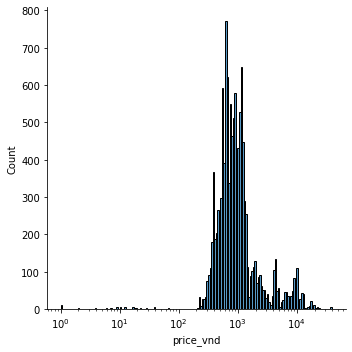

In [8]:
sns.displot(new_data_set[new_data_set["Tình trạng:"] == "Xe mới"]["price_vnd"], log_scale=10)

    

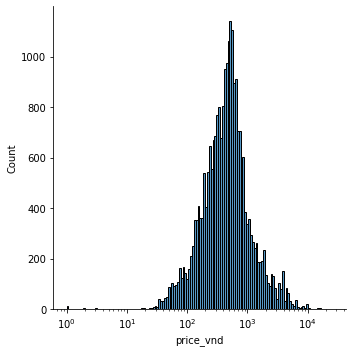

In [10]:
sns.displot(new_data_set[new_data_set["Tình trạng:"] == "Xe đã dùng"]["price_vnd"], log_scale=10)

In [11]:
new_data_set["model_year"].describe()

count    36617.000000
mean      2015.441462
std          5.501854
min       1990.000000
25%       2012.000000
50%       2017.000000
75%       2020.000000
max       2021.000000
Name: model_year, dtype: float64

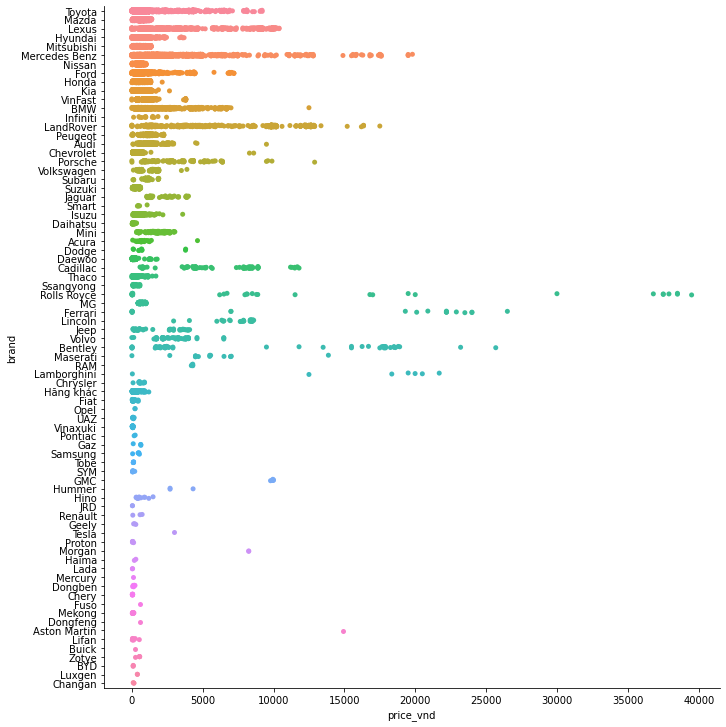

In [20]:
sns.catplot(y="brand", x="price_vnd", data=new_data_set,height=12)

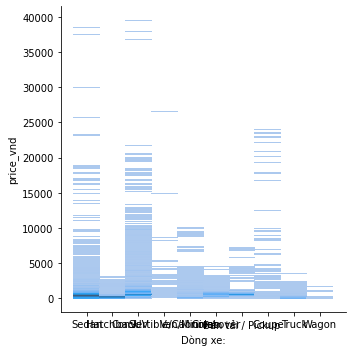

In [22]:
sns.displot(x="Dòng xe:", y="price_vnd", data=new_data_set)

In [10]:
KEY_BRAND = "brand"
KEY_SERIE = "serie"
KEY_DONG_XE = "Dòng xe:"
for key in new_data_set["brand"].unique():
    print(f"{key}: {new_data_set[new_data_set[KEY_BRAND] == key][KEY_SERIE].unique()}")

Toyota: ['Corolla altis' 'Land Cruiser' 'Camry' 'Fortuner' 'Vios' 'Zace' 'Corolla'
 'Prado' 'Highlander' 'Innova' 'Hiace' 'Rush' 'Corolla Cross' 'Yaris'
 'Crown' 'Sienna' 'Wigo' 'Hilux' 'Avanza' 'Venza' 'RAV4' 'Matrix' 'Avalon'
 'Alphard' 'Previa' 'Solara' 'Prius' 'Corona' 'Fj cruiser' 'Khác'
 '4 Runner' 'Cressida' 'Wish' 'Van' 'Tundra' 'Granvia' 'Aygo' 'Celica'
 'IQ' 'Caldina' 'Mark II' 'Carina']
Mazda: ['3' 'CX5' 'BT50' 'CX8' '6' '2' '323' 'CX9' '626' 'Premacy' 'MPV' 'RX 8'
 'Khác' 'B series' '929']
Lexus: ['IS' 'RX' 'LX' 'ES' 'NX' 'GX' 'LM' 'LS' 'GS' 'HS']
Hyundai: ['Elantra' 'Accent' 'Kona' 'i10' 'SantaFe' 'Tucson' 'Verna' 'Sonata'
 'Getz' 'Grand Starex' 'Avante' 'Mighty' 'i30' 'Solati' 'HD' 'Porter'
 'Starex' 'Universe' 'i20' 'Khác' 'County' 'H 100' 'Eon' 'Tuscani'
 'Galloper' 'XG' 'Veracruz' 'Genesis' 'Terracan' 'Xcent' 'Creta'
 'Veloster' 'Gold' 'Equus' 'Click' 'Libero' 'H 1' 'Azera' 'eMighty'
 'Grace' 'Universe Xpress Luxury']
Mitsubishi: ['Mirage' 'Triton' 'Xpander' 'Attrage' 

In [11]:
for key in new_data_set["brand"].unique():
    print(f"{key}: {new_data_set[new_data_set[KEY_BRAND] == key][KEY_DONG_XE].unique()}")


Toyota: ['Sedan' 'SUV' 'Van/Minivan' 'Crossover' 'Hatchback' 'Bán tải / Pickup'
 'Wagon' 'Convertible/Cabriolet' 'Coupe']
Mazda: ['Hatchback' 'SUV' 'Bán tải / Pickup' 'Sedan' 'Crossover' 'Wagon'
 'Coupe']
Lexus: ['Sedan' 'SUV' 'Convertible/Cabriolet' 'Van/Minivan' 'Crossover']
Hyundai: ['Sedan' 'Crossover' 'SUV' 'Hatchback' 'Van/Minivan' 'Truck' 'Coupe'
 'Bán tải / Pickup' 'Wagon']
Mitsubishi: ['Hatchback' 'Bán tải / Pickup' 'SUV' 'Sedan' 'Crossover'
 'Convertible/Cabriolet' 'Van/Minivan' 'Truck']
Mercedes Benz: ['Sedan' 'SUV' 'Coupe' 'Van/Minivan' 'Hatchback' 'Crossover'
 'Convertible/Cabriolet']
Nissan: ['SUV' 'Bán tải / Pickup' 'Sedan' 'Hatchback' 'Crossover' 'Van/Minivan']
Ford: ['SUV' 'Bán tải / Pickup' 'Van/Minivan' 'Sedan' 'Hatchback'
 'Convertible/Cabriolet' 'Coupe' 'Crossover']
Honda: ['Sedan' 'Hatchback' 'SUV' 'Crossover' 'Van/Minivan']
Kia: ['Sedan' 'Van/Minivan' 'Hatchback' 'SUV' 'Crossover' 'Truck' 'Coupe']
VinFast: ['Sedan' 'SUV' 'Hatchback']
BMW: ['Convertibl